# 🔍 1. Healthcare Readmission Prediction System
## 📌 Problem Statement:
Hospitals want to reduce unnecessary readmissions within 30 days of discharge, which cost billions annually and reduce care quality.
## 🎯 Objectives:
-	Predict if a patient will be readmitted within 30 days
-	Identify risk factors contributing to readmission
-	Help hospital staff intervene early
## 🪜 Steps to Implement:
-	Use datasets like Hospital Readmissions (UCI)
-	Data preprocessing (missing values, encoding)
-	Use classification algorithms: Logistic Regression, Random Forest, XGBoost
-	Feature importance analysis
-	Build a simple app with Streamlit for clinicians
## 🧠 Final Insights:
-	Model to predict readmission with 75%+ accuracy
-	Risk factors like number of previous visits, specific diagnoses
-	Recommendations for personalized post-discharge plans


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Preprocessing Data

In [3]:
df = pd.read_csv('diabetic_data.csv')
df.head()
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
for col in df.columns:
    print(f"{col}: {df[col].isin(['?']).sum()}")

encounter_id: 0
patient_nbr: 0
race: 2273
gender: 0
age: 0
weight: 98569
admission_type_id: 0
discharge_disposition_id: 0
admission_source_id: 0
time_in_hospital: 0
payer_code: 40256
medical_specialty: 49949
num_lab_procedures: 0
num_procedures: 0
num_medications: 0
number_outpatient: 0
number_emergency: 0
number_inpatient: 0
diag_1: 21
diag_2: 358
diag_3: 1423
number_diagnoses: 0
max_glu_serum: 0
A1Cresult: 0
metformin: 0
repaglinide: 0
nateglinide: 0
chlorpropamide: 0
glimepiride: 0
acetohexamide: 0
glipizide: 0
glyburide: 0
tolbutamide: 0
pioglitazone: 0
rosiglitazone: 0
acarbose: 0
miglitol: 0
troglitazone: 0
tolazamide: 0
examide: 0
citoglipton: 0
insulin: 0
glyburide-metformin: 0
glipizide-metformin: 0
glimepiride-pioglitazone: 0
metformin-rosiglitazone: 0
metformin-pioglitazone: 0
change: 0
diabetesMed: 0
readmitted: 0


In [5]:
df = df.drop(columns=['weight', 'payer_code','medical_specialty'])

df['race'] = df['race'].replace('?', 'Unknown')
df['diag_1'] = df['diag_1'].replace('?', 'Unknown')
df['diag_2'] = df['diag_2'].replace('?', 'Unknown')
df['diag_3'] = df['diag_3'].replace('?', 'Unknown')

In [6]:
df['readmitted'] = df['readmitted'].replace({'NO':0,'>30':0,'<30':1})
df_encoded = pd.get_dummies(df,drop_first=True)

C:\Users\Zishan\AppData\Local\Temp\ipykernel_13560\551174899.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'NO':0,'>30':0,'<30':1})


In [7]:
X = df_encoded.drop('readmitted',axis=1)
y = df_encoded['readmitted']

### Splitting Data into Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

### Fitting Data into a model

In [9]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Prediction

In [10]:
print(y_pred)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.70      0.01      0.01      2271

    accuracy                           0.89     20354
   macro avg       0.79      0.50      0.48     20354
weighted avg       0.87      0.89      0.84     20354

0.8888179227670236


### Feature Importance Analysis

In [11]:
importances = model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'feature':feature_names,'importance':importances})

feature_importance_df = feature_importance_df.sort_values(by='importance',ascending=False)

print(feature_importance_df.head(10))

                     feature  importance
0               encounter_id    0.051954
1                patient_nbr    0.051172
6         num_lab_procedures    0.046438
8            num_medications    0.043524
11          number_inpatient    0.038514
5           time_in_hospital    0.035115
3   discharge_disposition_id    0.028962
12          number_diagnoses    0.025073
7             num_procedures    0.024942
2          admission_type_id    0.018964


C:\Users\Zishan\AppData\Local\Temp\ipykernel_13560\3585700327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


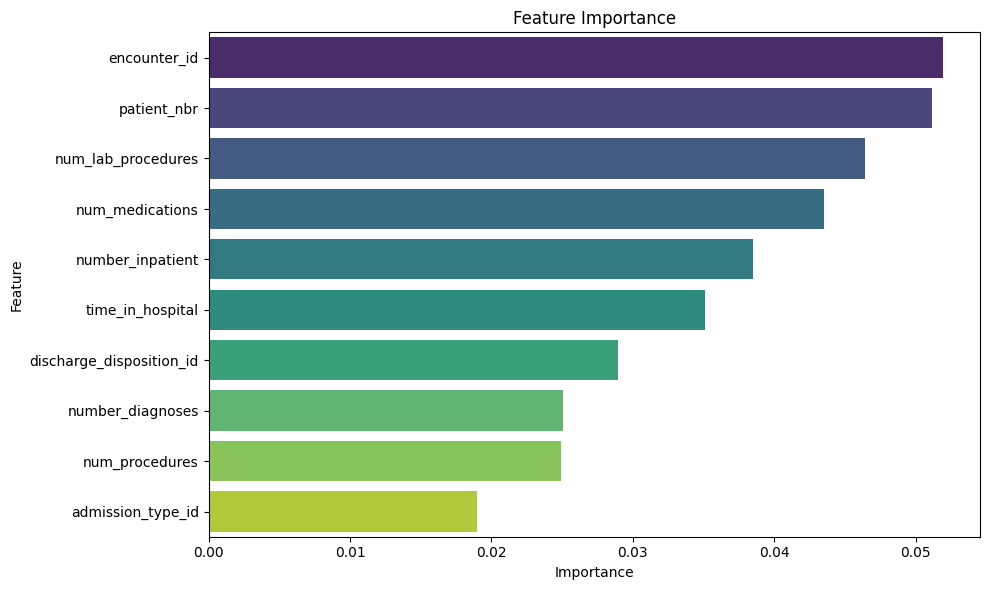

In [12]:
top_features = feature_importance_df.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title("Feature Importance")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Confusion Matrix

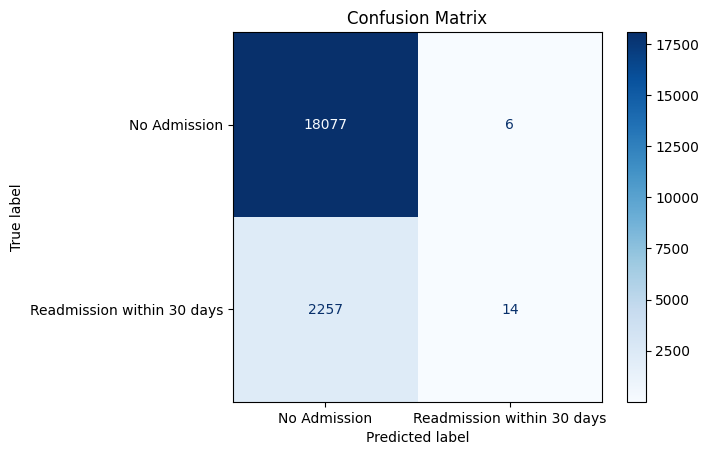

In [13]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Admission', 'Readmission within 30 days'])

disp.plot(cmap= 'Blues')
plt.title('Confusion Matrix')
plt.show()